### Import Libraries

In [3]:
import pathlib
import pandas as pd
from joblib import load

import sys
sys.path.append("../utils")
from split_utils import get_features_data
from train_utils import get_dataset
from single_cell_utils import get_15_correct_sample_images, plot_15_correct_sample_images

### Load Model and Test Dataset

In [4]:
# load final logistic regression model
model_dir = pathlib.Path("../2.train_model/models/")
log_reg_model_path = pathlib.Path(f"{model_dir}/log_reg_model.joblib")
log_reg_model = load(log_reg_model_path)

# load test data
data_split_path = pathlib.Path("../1.split_data/indexes/data_split_indexes.tsv")
data_split_indexes = pd.read_csv(data_split_path, sep="\t", index_col=0)
features_dataframe_path = pathlib.Path("../0.download_data/data/training_data.csv.gz")
features_dataframe = get_features_data(features_dataframe_path)
test_data = get_dataset(features_dataframe, data_split_indexes, "test")

### Get 5 best performing classes (final model, test dataset)

In [6]:
# load compiled f1 scores
compiled_f1_scores_path = pathlib.Path("../3.evaluate_model/evaluations/F1_scores/compiled_F1_scores.tsv")
compiled_f1_scores = pd.read_csv(compiled_f1_scores_path, sep="\t", index_col=0)

# only get f1 score data for final model on test data
final_model_test_f1_scores = compiled_f1_scores.loc[(compiled_f1_scores['shuffled'] == False) & (compiled_f1_scores['data_split'] == "test")]
# sort the F1 score data highest to lowest
final_model_test_f1_scores = final_model_test_f1_scores.sort_values(["F1_Score"], ascending=False)
# only use top 5 performing phenotypes
final_model_test_f1_scores = final_model_test_f1_scores.head(5)
# preview phenotypic classes and F1 scores
final_model_test_f1_scores

,Phenotypic_Class,F1_Score,data_split,shuffled
12,OutOfFocus,0.967742,test,False
6,Grape,0.890411,test,False
13,Polylobed,0.866935,test,False
5,Elongated,0.857143,test,False
9,Large,0.814815,test,False


### Show 3 examples of correct predictions for each of top 5 performing phenotypic classes

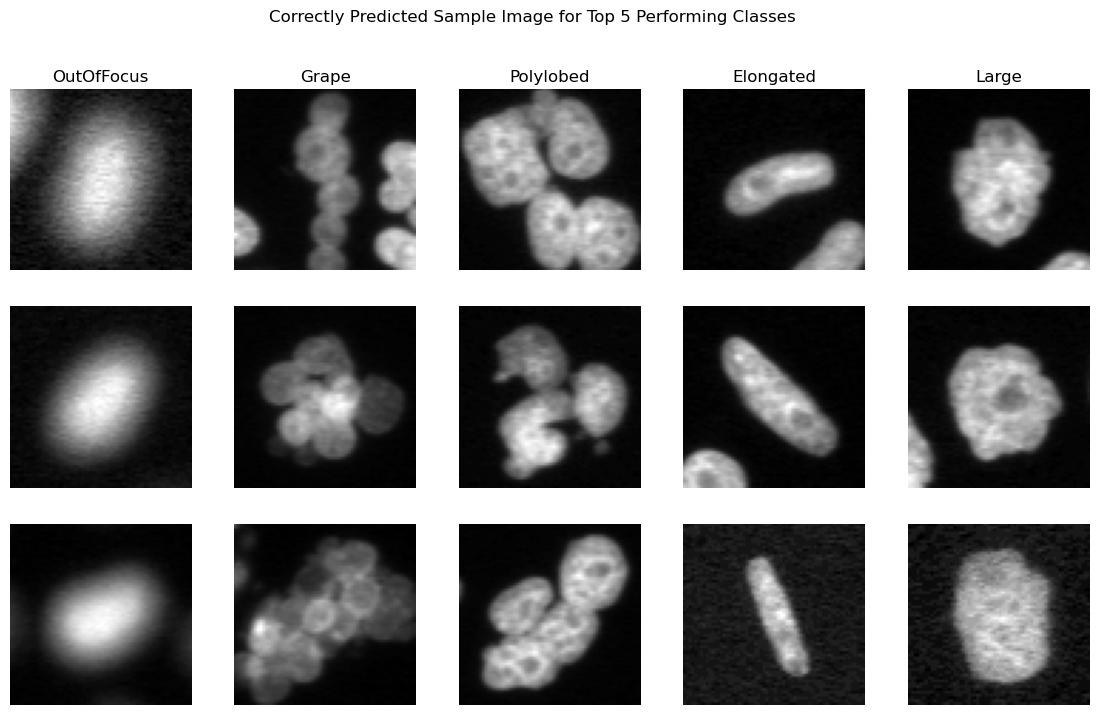

In [7]:
single_cell_images_dir_path = pathlib.Path("mitocheck_single_cell_images/")

phenotypic_classes = final_model_test_f1_scores["Phenotypic_Class"].tolist()
correct_15_images = get_15_correct_sample_images(
    phenotypic_classes, test_data, log_reg_model, single_cell_images_dir_path
)

plot_15_correct_sample_images(correct_15_images)